# UNDERSTANDING DATABASE NORTHWIND

## Context

Sebuah perusahaan fiktif "**Northwind**", bergerak di bidang ekspor-impor makanan khusus dari seluruh dunia ingin mengetahui gambaran secara umum tentang bisnis yang mereka jalankan. Dimana perusahaan ini memberikan database mereka yang menunjukan detail dari proses transaksi dengan skema bisnis yang baik dengan basis data penjualan mereka. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini.

## Database Information

Sumber Database : https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Dimana Database ini mempunyai 13 Tabel, yaitu :
- **categories**           : Menyimpan informasi tentang kategori makanan
- **customercustomerdemo** : Sub-relations dari tabel customers
- **customerdemographics** : Sub-relations dari tabel customercustomerdemo
- **customers**            : Menyimpan informasi pelanggan yang membeli produk dari Northwind
- **employees**            : Menyimpan detail informasi karyawan dari Northwind 
- **employeeterritories**  : Sub-relations dari tabel employees dan territories
- **orderdetails**         : Sub-relations dari tabel orders dan tabel products, berisikan detail dari pesanan
- **orders**               : Menyimpan informasi detail tentang transaksi antara pelanggan dan perusahaan
- **products**             : Menyimpan informasi detail tentang produk
- **region**               : Sub-relations dari tabel territories
- **shippers**             : Menyimpan detail informasi dari pengiriman
- **suppliers**            : Menyimpan informasi Suppliers dan Vendors dari Northwind
- **territories**          : Sub-relations dari tabel Employee territories

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# DATABASE

## Connecting to Database

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [282]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [283]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'northwind'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [284]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## Data Detail & Customers

Data ini merupakan data utama yang nantinya akan dianalisis lebih lanjut. Data ini merupakan gabungan dari tabel ``customers``, ``orders``, ``ordersdetails``, ``products`` dan ``categories``. Masing-masing dari setiap tabel tersebut diambil kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :

**Tabel customers**
- CustomerID dari tabel customers
- CompanyName dari tabel customers
- ContactName dari tabel customers
- ContactTitle dari tabel customers
- City dari tabel customers
- Region dari tabel customers
- PostalCode dari tabel customers
- Country dari tabel customers

**Tabel orders**
- CustomerID dari tabel orders
- OrderID dari tabel orders
- OrderDate dari tabel orders
- RequiredDate dari tabel orders
- ShippedDate dari tabel orders
- Freight dari tabel orders

**Tabel orderdetails**
- OrderID dari tabel orderdetails
- ProductID dari tabel orderdetails
- Quantity dari tabel orderdetails

**Tabel products**
- ProductID dari tabel products
- ProductName dari tabel products
- UnitPrice dari tabel products
- UnitsInStock dari tabel products
- UnitsOnOrder dari tabel products
- Discontinued dari tabel products

**Tabel categories**
- CategoryID dari tabel categories
- CategoryName dari tabel categories

Selain dari tabel, terdapat dua kolom baru yang akan dibuat :
- ProcessingDate : selisih antara OrderDate dan ShippedDate
- Restock : selisih antara UnitsInStock dan UnitsOnOrder

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya

In [285]:
#Query 1

tabel1 = sql_table(
    '''
select c.CustomerID, c.CompanyName, c.ContactName, c.ContactTitle, c.City, c.Region, c.PostalCode, c.Country,
o.OrderID, o.OrderDate, o.RequiredDate, o.ShippedDate, o.Freight,
od.ProductID, od.Quantity,
p.ProductName, p.UnitPrice, p.UnitsInStock, p.UnitsOnOrder, p.ReorderLevel, p.Discontinued,
ca.CategoryName,
(timediff(o.ShippedDate,o.OrderDate))ProcessingDate,
(p.UnitsInStock - p.UnitsOnOrder) Restock 
from customers c
left join orders o on c.CustomerID = o.CustomerID
left join orderdetails od on o.OrderID = od.OrderID
left join products p on od.ProductID = p.ProductID
left join categories ca on p.CategoryID = ca.CategoryID;
    ''')

In [286]:
#Melihat sekilas isi dari Tabel 1

tabel1

,CustomerID,CompanyName,ContactName,ContactTitle,City,Region,PostalCode,Country,OrderID,OrderDate,...,Quantity,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,ProcessingDate,Restock
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,None,12209,Germany,10643.0,1997-08-25,...,15.0,Rssle Sauerkraut,45.6000,26.0,0.0,0.0,1.0,Produce,8 days,26.0
1,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,None,12209,Germany,10643.0,1997-08-25,...,21.0,Chartreuse verte,18.0000,69.0,0.0,5.0,0.0,Beverages,8 days,69.0
2,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,None,12209,Germany,10643.0,1997-08-25,...,2.0,Spegesild,12.0000,95.0,0.0,0.0,0.0,Seafood,8 days,95.0
3,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,None,12209,Germany,10692.0,1997-10-03,...,20.0,Vegie-spread,43.9000,24.0,0.0,5.0,0.0,Condiments,10 days,24.0
4,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,None,12209,Germany,10702.0,1997-10-13,...,6.0,Aniseed Syrup,10.0000,13.0,70.0,25.0,0.0,Condiments,8 days,-57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,Warszawa,None,01-012,Poland,10998.0,1998-04-03,...,12.0,Guaran Fantstica,4.5000,20.0,0.0,0.0,1.0,Beverages,14 days,20.0
2155,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,Warszawa,None,01-012,Poland,10998.0,1998-04-03,...,7.0,Sirop d'rable,28.5000,113.0,0.0,25.0,0.0,Condiments,14 days,113.0
2156,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,Warszawa,None,01-012,Poland,10998.0,1998-04-03,...,20.0,Longlife Tofu,10.0000,4.0,20.0,5.0,0.0,Produce,14 days,-16.0
2157,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,Warszawa,None,01-012,Poland,10998.0,1998-04-03,...,30.0,Rhnbru Klosterbier,7.7500,125.0,0.0,25.0,0.0,Beverages,14 days,125.0


## **Data Jenis Product, Banyak Produk**

Data kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini memuat jenis produk yang tersedia mulai dari Beverages hingga Seafood, lengkap dengan banyaknya jenis produk. Dari data ini juga bisa dilihat keadaan stock barang berdasarkan kategorinya.

In [287]:
#Query 2

tabel2 = sql_table(
    '''
select p.CategoryID, c.CategoryName, count(p.CategoryID) Banyak_Produk 
from products p 
left join categories c on p.CategoryID = c.CategoryID 
group by CategoryName 
order by CategoryID
    ''')

tabel2

,CategoryID,CategoryName,Banyak_Produk
0,1,Beverages,12
1,2,Condiments,12
2,3,Confections,13
3,4,Dairy Products,10
4,5,Grains/Cereals,7
5,6,Meat/Poultry,6
6,7,Produce,5
7,8,Seafood,12


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## Data Anomalies

In [288]:
#check info tabel 1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   CustomerID      2159 non-null   object         
 1   CompanyName     2159 non-null   object         
 2   ContactName     2159 non-null   object         
 3   ContactTitle    2159 non-null   object         
 4   City            2157 non-null   object         
 5   Region          826 non-null    object         
 6   PostalCode      2102 non-null   object         
 7   Country         2157 non-null   object         
 8   OrderID         2155 non-null   float64        
 9   OrderDate       2155 non-null   datetime64[ns] 
 10  RequiredDate    2155 non-null   datetime64[ns] 
 11  ShippedDate     2082 non-null   datetime64[ns] 
 12  Freight         2155 non-null   object         
 13  ProductID       2155 non-null   float64        
 14  Quantity        2155 non-null   float64 

## **Melihat Data Sekilas Dari General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 2159 baris data dengan total 23 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, datetime64, timedelta64 dan float. 

1. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada ```Region```. Features tersebut kehilangan lebih dari 50% data. Selain dari itu, ada beberapa feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. **Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.**


2. Fokus berikutnya adalah perhatikan pada features berikut ini: 
    - Freight
    - UnitPrice
    
   Yang kedua, yaitu pada features ``Freight`` dan juga ``UnitPrice``. Kedua feature ini sama seperti sebelumnya, masih dibaca sebagai object yang seharusnya merupakan tipe data ```Integer```. Oleh karena itu, kedua features ini juga harus ditanggulangi dengan cara mengubah tipe datanya. Dari kedua penjelasan tersebut, maka **kesimpulan keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**
   

3. Fokus berikutnya adalah pada features ``PostalCode``. Pada Postal Code / Zip Code pada sebuah daerah adalah 6 series number yang memudahkan untuk proses sorting mailing address. Pada data di tabel1, kolom PostalCode mempunyai beragam cara penulisan yang salah. Hal ini mungkin disebabkan oleh Human Error dsb. Untuk mengatasinya, maka kita akan melakukan drop (delete) kolom PostalCode pada tabel1. **Kesimpulan ketiga adalah bahwa terdapat anomali data yang mungkin disebabkan oleh Human Error dsb, yang harus ditanggulangi**

In [289]:
# Check Missing Value Percentage

tabel1.isnull().sum()

CustomerID           0
CompanyName          0
ContactName          0
ContactTitle         0
City                 2
Region            1333
PostalCode          57
Country              2
OrderID              4
OrderDate            4
RequiredDate         4
ShippedDate         77
Freight              4
ProductID            4
Quantity             4
ProductName          4
UnitPrice            4
UnitsInStock         4
UnitsOnOrder         4
ReorderLevel         4
Discontinued         4
CategoryName         4
ProcessingDate      77
Restock              4
dtype: int64

## **Missing Values**

Telah dijelaskan sebelumnya, terdapat beberapa feature yang memang memiliki missing values. Yang paling jadi sorotan adalah ``Region`` yang memiliki total missing value yang lebih dari 50%. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, setengah dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya banyak informasi. Tentu saja hal tersebut tidak dibenarkan. Untuk mengatasi hal tersebut, maka kedua feature tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

Lalu, bagaimana dengan feature lainnya? Selain dari feature``Region``, hampir semua feature memiliki missing value sebanyak 2, 4 dan 77. Dari segi angka, bisa diasumsikan bahwa  data yang hilang tersebut adalah bagian dari row yang sama yang merupakan data yang betul-betul kosong dari database-nya. Sehingga, cara untuk mengatasinya cukup dengan melakukan drop data termasuk untuk ``shippedDate`` & ``ProcessingDate``, meskipun total missing valuenya mencapai 77 data (hal tersebut karena 77 dari 2159 data hanya kurang lebih 3.5% data, sehingga tidak akan mengurangi informasi secara signifikan).

## **Handling Anomalies**

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Bagian pertama jelas akan dilakukan drop features ``Region``. Setelah drop feature tersebut, kita juga akan men-drop feature ``PostalCode`` dikarenakan banyaknya penulisan series yang tidak benar pada PostalCode dikarenakan Human Error dsb. Setelah itu, barulah kemudian missing value dari setiap row-nya dihapus.

In [290]:
# Remove Missing Value 1

tabel1.drop(['Region', 'PostalCode'], axis=1, inplace = True)

In [291]:
# Remove Missing Value 2

tabel1.dropna(inplace = True)

In [292]:
# Recheck Info

tabel1.isnull().sum()

CustomerID        0
CompanyName       0
ContactName       0
ContactTitle      0
City              0
Country           0
OrderID           0
OrderDate         0
RequiredDate      0
ShippedDate       0
Freight           0
ProductID         0
Quantity          0
ProductName       0
UnitPrice         0
UnitsInStock      0
UnitsOnOrder      0
ReorderLevel      0
Discontinued      0
CategoryName      0
ProcessingDate    0
Restock           0
dtype: int64

## **Recheck Missing Value Information**

Setelah melakukan proses drop missing value, baik itu drop terhadap features maupun row, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali, dan pada feature ```Region``` serta ```PostalCode``` sudah tidak ada juga (karena sudah di-drop). Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

## **Mengubah Tipe Data Yang Salah**

Oke, telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai yaitu``Freight`` dan ``UnitPrice``. Kedua features tersebut terlebih dahulu diubah agar fungsionalitasnya dapat dipakai dan tidak menyebabkan error dan features tersebut dapat dipergunakan sebagaimana mestinya.

In [293]:
# Change Spesific Column To Numeric

tabel1['Freight'] = pd.to_numeric(tabel1['Freight'])
tabel1['UnitPrice'] = tabel1['UnitPrice'].astype(float, errors = 'raise')

In [294]:
# Recheck Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2158
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   CustomerID      2082 non-null   object         
 1   CompanyName     2082 non-null   object         
 2   ContactName     2082 non-null   object         
 3   ContactTitle    2082 non-null   object         
 4   City            2082 non-null   object         
 5   Country         2082 non-null   object         
 6   OrderID         2082 non-null   float64        
 7   OrderDate       2082 non-null   datetime64[ns] 
 8   RequiredDate    2082 non-null   datetime64[ns] 
 9   ShippedDate     2082 non-null   datetime64[ns] 
 10  Freight         2082 non-null   float64        
 11  ProductID       2082 non-null   float64        
 12  Quantity        2082 non-null   float64        
 13  ProductName     2082 non-null   object         
 14  UnitPrice       2082 non-null   float64 

## **Recheck Data Information**

Bagian sebelumnya, 2 features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. Mari fokus kedua data yang sudah disebutkan sebelumnya. 

Feature ``Freight`` dan ``UnitPrice`` yang awalnya bertipe data object sudah berubah menjadi float64. Dengan begini, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi. 

In [295]:
# Check Dupliacate

tabel1[tabel1.duplicated()]

,CustomerID,CompanyName,ContactName,ContactTitle,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,...,Quantity,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,ProcessingDate,Restock


## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Unique Value 'ProcessingDate & Restock'**

Sebelumnya, saya sudah membuat kolom baru bernama ProcessingDate dan Restock saat query tabel1 sebagaimana yang sudah didefinisikan sebelumnya. mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

In [296]:
# Check Data Anomalies pada feature ProcessingDate

tabel1['ProcessingDate'].value_counts()

7 days 00:00:00     271
6 days 00:00:00     241
3 days 00:00:00     187
9 days 00:00:00     184
5 days 00:00:00     177
4 days 00:00:00     176
8 days 00:00:00     174
2 days 00:00:00     149
10 days 00:00:00    129
12 days 00:00:00     45
1 days 00:00:00      43
11 days 00:00:00     34
19 days 00:00:00     23
21 days 00:00:00     20
29 days 00:00:00     19
18 days 00:00:00     19
13 days 00:00:00     17
23 days 00:00:00     15
32 days 00:00:00     15
34 days 22:59:59     14
15 days 00:00:00     14
34 days 00:00:00     13
25 days 00:00:00     13
20 days 00:00:00     13
14 days 00:00:00     12
30 days 00:00:00     11
17 days 00:00:00     11
22 days 00:00:00     11
24 days 00:00:00     11
28 days 00:00:00      8
26 days 00:00:00      5
27 days 00:00:00      4
31 days 00:00:00      3
16 days 00:00:00      1
Name: ProcessingDate, dtype: int64

setelah melihat tabel diatas, terlihat bahwa tidak ada data yang menunjukkan nilai minus pada tabel ``ProcessingDate``. Maka dapat kita simpulkan bahwa data pada tabel ``ProcessingDate`` tidak memiliki anomalies di dalamnya.

In [297]:
# Check Data Anomalies pada feature Restock

tabel1['Restock'].value_counts()

 26.0     132
 20.0     122
 0.0      107
 17.0      72
 112.0     61
         ... 
 52.0       9
 49.0       9
-96.0       7
-55.0       6
-39.0       6
Name: Restock, Length: 61, dtype: int64

## **Anomali Pada Restock**

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut, terdapat stock yang menunjukan nilai minus (-96, -55 dan -39) dan terdapat 19 data di dalamnya. Asumsinya adalah kemungkinan murni ada kesalahan input oleh user saat memasukan ke dalam database (Human Error)

Dari asumsi tersebut, cara mengatasinya cukup dengan mengabaikan (dipertahankan) karena bisa dilakukan analisis lebih lanjut untuk mengetahui letak permasalahannya

## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [298]:
# Clean Data

tabel1.sample(5)

,CustomerID,CompanyName,ContactName,ContactTitle,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,...,Quantity,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,ProcessingDate,Restock
1597,RICSU,Richter Supermarkt,Michael Holz,Sales Manager,Genve,Switzerland,10951.0,1998-03-16,1998-04-27,1998-04-07,...,6.0,Jack's New England Clam Chowder,9.65,85.0,0.0,10.0,0.0,Seafood,22 days,85.0
1746,SAVEA,Save-a-lot Markets,Jose Pavarotti,Sales Representative,Boise,USA,11064.0,1998-05-01,1998-05-29,1998-05-04,...,12.0,Jack's New England Clam Chowder,9.65,85.0,0.0,10.0,0.0,Seafood,3 days,85.0
2040,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Oulu,Finland,10416.0,1997-01-16,1997-02-13,1997-01-27,...,20.0,Ravioli Angelo,19.50,36.0,0.0,20.0,0.0,Grains/Cereals,11 days,36.0
1316,QUEEN,Queen Cozinha,Lcia Carvalho,Marketing Assistant,Sao Paulo,Brazil,10372.0,1996-12-04,1997-01-01,1996-12-09,...,12.0,Sir Rodney's Marmalade,81.00,40.0,0.0,0.0,0.0,Confections,5 days,40.0
1219,OTTIK,Ottilies Kseladen,Henriette Pfalzheim,Owner,Kln,Germany,10407.0,1997-01-07,1997-02-04,1997-01-30,...,30.0,Queso Cabrales,21.00,22.0,30.0,30.0,0.0,Dairy Products,23 days,-8.0


In [299]:
# Groupping and Aggregating

Aggregate = tabel1[['UnitPrice','Discontinued']].groupby('Discontinued').describe()
Aggregate

UnitPrice                                                      
                 count       mean        std  min   25%   50%    75%     max
Discontinued                                                                
0.0             1861.0  26.666926  30.823924  2.5  12.5  19.0  33.25  263.50
1.0              221.0  40.830226  38.656280  4.5  14.0  32.8  45.60  123.79

Terdapat sebuah feature ``Discontinued`` pada dataset. Feature ini merupakan daftar status produksi pada tabel produk. Dimana jika feature berstatus 0 maka produk tersebut masih diproduksi dan jika feature berstatus 1 maka produk tersebut sudah tidak di produksi kembali.

Mari kita lihat hasil tabel dari Aggregate diatas. Dapat disimpulkan bawa secara garis besar, masih banyak kategori produk dengan sub produk tertentu yang masih di produksi oleh perusahaan dari semua total penjualan. Namun jika kita melihat ``UnitPrice``, secara rata-rata nilai beli barang pada produk yang di stop produksi (discontinued) lebih besar dibandingkan dengan yang masih diproduksi (continued) yakni 40.83 juta US Dollar. Bisa dibayangkan bahwa hanya dengan 8 produk yang discontinued dan total order produk sebanyak 221 pieces, perusahaan akan mengurangi penjualan bersih mereka sebesar 40.83 juta US Dollar (hampir 2/3 nilai dari rata-rata nilai beli barang keseluruhan).

In [300]:
# Mencari Alasan

tabel3 = sql_table(
    '''
    select ProductID, UnitsInStock, UnitsOnOrder, ReorderLevel, Discontinued
    from products
    where Discontinued = 1.0
    '''
)
tabel3

,ProductID,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,5,0,0,0,1
1,9,29,0,0,1
2,17,0,0,0,1
3,24,20,0,0,1
4,28,26,0,0,1
5,29,0,0,0,1
6,42,26,0,0,1
7,53,0,0,0,1


Walaupun secara aggregate rata-rata nilai beli barang pada produk yang di stop produksi (discontinued) lebih besar dibandingkan dengan yang masih diproduksi (continued), kita dapat mengetahui kenapa 8 produk tersebut di discontinued (lihat tabel3).
Pada tabel3, kita dapat mengambil kesimpulan bahwa 8 produk tersebut di discontinued dikarenakan sudah tidak adanya lagi customers yang melakukan reorder (``ReorderLevel``) bahkan sedang melakukan order (``UnitsOnOrder``) dan stock unitnya (``UnitsInStock``) pun kebanyakan kosong atau menipis. Kemungkinan besar perusahaan melakukan discontinued pada produk ini for good reason.

In [301]:
#Tabel tambahan untuk analisa lebih lanjut (pie chart)

tabel4 = sql_table(
    '''
    select ProductID, UnitsInStock, UnitsOnOrder, ReorderLevel, Discontinued
    from products
    '''
)

## **Melihat Data Outlier pada feature ``UnitsInStock``**


In [302]:
# Outlier Check With Function

Q1_amount = tabel1['UnitsInStock'].describe()['25%']
Q3_amount = tabel1['UnitsInStock'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['UnitsInStock'] < Q1_amount - (1.5 * iqr)) | (tabel1['UnitsInStock']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['UnitsInStock'] > Q1_amount - (1.5 * iqr)) & (tabel1['UnitsInStock']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,CustomerID,CompanyName,ContactName,ContactTitle,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,...,Quantity,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,ProcessingDate,Restock
8,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,Germany,10952.0,1998-03-16,1998-04-27,1998-03-24,...,16.0,Grandma's Boysenberry Spread,25.00,120.0,0.0,25.0,0.0,Condiments,8 days,120.0
26,ANTON,Antonio Moreno Taquera,Antonio Moreno,Owner,Mxico D.F.,Mexico,10535.0,1997-05-13,1997-06-10,1997-05-21,...,10.0,Boston Crab Meat,18.40,123.0,0.0,30.0,0.0,Seafood,8 days,123.0
36,ANTON,Antonio Moreno Taquera,Antonio Moreno,Owner,Mxico D.F.,Mexico,10682.0,1997-09-25,1997-10-23,1997-10-01,...,30.0,Rhnbru Klosterbier,7.75,125.0,0.0,25.0,0.0,Beverages,6 days,125.0
75,BERGS,Berglunds snabbkp,Christina Berglund,Order Administrator,Lule,Sweden,10280.0,1996-08-14,1996-09-11,1996-09-12,...,30.0,Rhnbru Klosterbier,7.75,125.0,0.0,25.0,0.0,Beverages,29 days,125.0
90,BERGS,Berglunds snabbkp,Christina Berglund,Order Administrator,Lule,Sweden,10572.0,1997-06-18,1997-07-16,1997-06-25,...,50.0,Boston Crab Meat,18.40,123.0,0.0,30.0,0.0,Seafood,7 days,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,WANDK,Die Wandernde Kuh,Rita Mller,Sales Representative,Stuttgart,Germany,10301.0,1996-09-09,1996-10-07,1996-09-17,...,10.0,Boston Crab Meat,18.40,123.0,0.0,30.0,0.0,Seafood,8 days,123.0
2009,WANDK,Die Wandernde Kuh,Rita Mller,Sales Representative,Stuttgart,Germany,10312.0,1996-09-23,1996-10-21,1996-10-03,...,10.0,Rhnbru Klosterbier,7.75,125.0,0.0,25.0,0.0,Beverages,10 days,125.0
2101,WHITC,White Clover Markets,Karl Jablonski,Owner,Seattle,USA,10596.0,1997-07-11,1997-08-08,1997-08-12,...,30.0,Rhnbru Klosterbier,7.75,125.0,0.0,25.0,0.0,Beverages,32 days,125.0
2135,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Helsinki,Finland,10879.0,1998-02-10,1998-03-10,1998-02-12,...,12.0,Boston Crab Meat,18.40,123.0,0.0,30.0,0.0,Seafood,2 days,123.0


# **DATA VISUALIZATION & STATISTICS**

## **Top 5 Loyal Costumer**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

In [303]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
fig = px.bar(tabel1['CompanyName'].value_counts().head(),
            title = 'Loyal Costumer')
fig.show()

Dari grafik diatas dapat kita lihat bahwa dari sekitar 2000an transaksi yang terjadi, hanya terdapat satu perusahaan yang memiliki data transaksi lebih dari 100 kali yakni Save-a-lot Markets. Ini menandakan bahwa Save-alot Markets merupakan perusahaan yang paling loyal dengan total transaksi lebih dari 100 kali. Adapun perusahaan-perusahaan yang masuk ke dalam top 5 loyal costumers antara lain : Save-a-lot Markets, Ernst Handel, QUICK-Stop, Hungry Owl All-Night Grocers dan Berglunds snabbkp.

Melihat dengan adanya segmentasi customers yang cukup loyal di dalam transaksi ini, menandakan bahwa terdapat peluang untuk menawarkan barang-barang baru kepada mereka. Dimana sebagai produsen, kita dapat menawarkan promosi atau special offer kepada customers yang cukup loyal membeli barang. Dimana hal ini dilakukan agar customers yang sudah memiliki kepercayaan terhadap perusahaan akan semakin bisa lebih sering melakukan transaksi.

Selain itu, kita juga dapat melihat data transaksi yang dibeli oleh customer lainnya dengan melihat features ``UnitsInOrder`` dan ``ReorderLevel`` sehingga kita mengetahui jenis barang yang banyak di order kembali oleh customers.

## **Negara Pemesan Produk Terbanyak**

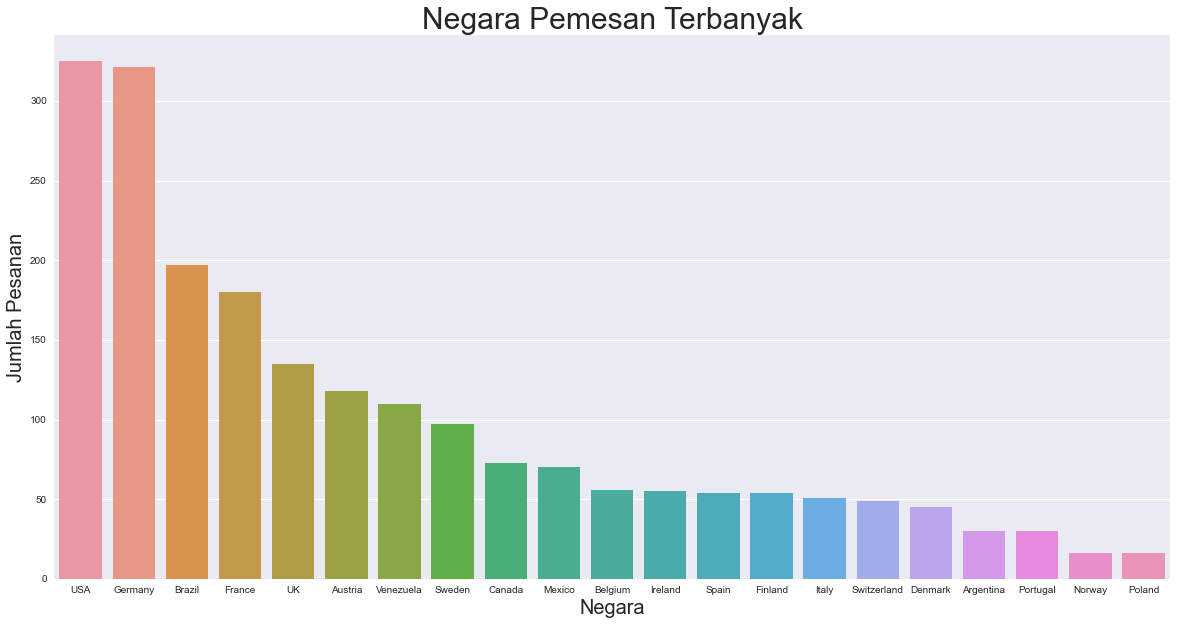

In [305]:
plt.figure(figsize=(20,10))
sns.countplot(tabel1['Country'],
            order = tabel1['Country'].value_counts().index)
plt.xlabel('Negara', size = 20)
plt.ylabel('Jumlah Pesanan', size = 20)
plt.title ('Negara Pemesan Terbanyak', size = 30)
plt.show()

Setelah sebelumnya telah mengetahui pelanggan atau customer yang loyal, berikutnya mari kita lihat negara mana saja yang menjadi pemesan terbanyak. Jika melihat data dari grafik di atas, terlihat jelas bahwa USA dan Germany menjadi negara tujuan pemesan terbanyak. Dimana kedua negara ini memiliki tingkat pembelian mencapai lebih dari 300. Jika kita melihat sesuai dengan grafik diatas secara seksama, maka dapat dilihat bahwa Negara Pemesan Terbanyak berasal dari negara-negara Benua Amerika dan Benua Eropa.

Dari kesimpulan diatas, kita dapat mempertimbangkan untuk membangun kantor pusat pada Benua Amerika dan Benua Eropa. Dimana negara yang dapat dijadikan kantor pusat adalah USA dan Germany (sebagai negara pemesan terbanyak). Hal ini bertujuan agar proses produksi dan distribusi dari negara tujuan pembeli dapat dilakukan dalam waktu cepat sehingga akan meningkatkan keuntungan jika pasar dari pelanggan ini tidak bergeser. 

Sebenarnya tidak ada masalah bagi perusahaan untuk mencoba pangsa pasar di benua lainnya (Asia, Afrika, Australia). Namun perusahaan mungkin harus menghadirkan produk makanan yang sesuai dengan makanan khas pada setiap benua tersebut atau dapat menyuplai produk ke perusahaan-perusahaan makanan barat di benua-benua tersebut.

## **Status Level Reorder Pada Transaksi VS Produksi Barang**

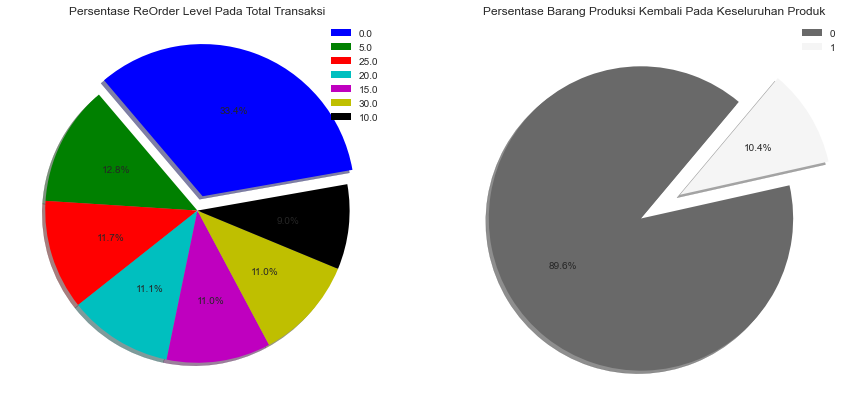

In [306]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.pie(tabel1['ReorderLevel'].value_counts().values, 
        autopct='%1.1f%%', shadow=True, startangle=10, colors=['b','g','r','c','m','y','k'], explode= (0.1,0,0,0,0,0,0))
plt.title ('Persentase ReOrder Level Pada Total Transaksi', size = 12)
plt.legend(tabel1['ReorderLevel'].unique())

plt.subplot(1,2,2)
plt.pie(tabel4['Discontinued'].value_counts().values, 
        autopct='%1.1f%%', explode= (0.1,0.2), shadow=True, startangle=50, colors=['dimgray','whitesmoke'])
plt.title ('Persentase Barang Produksi Kembali Pada Keseluruhan Produk', size = 12)
plt.legend(tabel4['Discontinued'].unique())
plt.show()

Telah kita ketahui sebelumnya bahwa ada beberapa barang yang ``Discontinued`` atau tidak di produksi kembali dengan maksud yang telah disebutkan. Dimana kemungkinan alasan Discontinued barang tersebut tidak terlepas dari dikitnya ``ReorderLevel`` pada barang tersebut (pangsa pasar pada produk tersebut mengalami penurunan). Pada pie chart pertama kita dapat melihat bahwa banyak produk pada data transaksi tidak mengalami reorder (pemesanan kembali) pada produk tersebut, dimana didalamnya terdapat 8 produk yang semuanya berstatus ``Discontinued`` oleh perusahaan (*lihat tabel 3).

Jika melihat nilai pada kedua pie chart tersebut, bisa disimpulkan bahwa perusahaan mungkin benar untuk men-cut 8 buah produk tersebut apabila perusahaan ingin memperbesar persentase reorder level transaksi dan berfokus untuk memaksimalkan profit dengan memproduksi dan menjual barang yang masih memiliki status reorder level yang masih tinggi.

## **Product Terlaris**

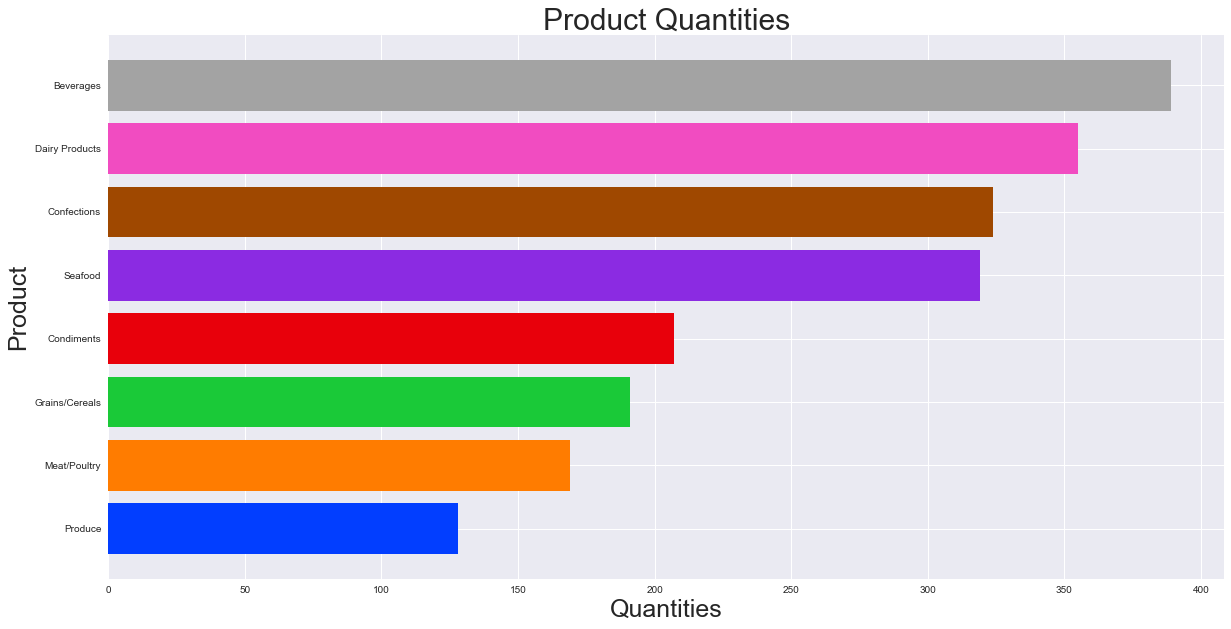

In [307]:
# Product Line Quantities

productQuanti = tabel1[['CategoryName', 'ProductName']].groupby(['CategoryName']).count().sort_values('ProductName')
x = productQuanti.index
y = productQuanti['ProductName']

plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(x,y, color = sns.color_palette('bright'))
plt.title('Product Quantities', size = 30)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.show()

Pada grafik diatas, kita alihkan fokus pada produk yang dijual dan ditawarkan. Terlihat top 3 product yang paling banyak dipesan adalah Beverages, Dairy Products dan Confections. Jika melihat jenis makanannya (Soft drinks, coffees, teas, beers, ales, Cheeses, Sweet and savory sauces, relishes, spreads, seasonings, ), ketiga product line yang menjadi top 3 ini adalah jenis makanan yang normal atau pada umumnya dibeli dan digunakan pada Benua Amerika dan Benua Eropa. Hal tersebut bisa menjadi alasan wajar kenapa ketiga line product ini menjadi yang paling banyak dibeli. 

Melihat keadaan tersebut, pihak perusahaan dapat menjadikan produksi Beverages, Dairy Products dan Confections untuk menjadi line produksi yang di prioritaskan. Hal ini dilakukan karena masih banyak demand pada ketiga line products ini di kedua benua tersebut. Namun mungkin perusahaan harus meakukan riset terlebih dahulu di setiap negara untuk mementukan stok pasaran yang bisa dibuat sehingga stock akan berbanding lurus dengan demand.

## **Amount Order per Bulan**

In [308]:
yearqty = tabel1[['OrderDate', 'Quantity']].groupby(pd.DatetimeIndex(tabel1['OrderDate']).year).sum()
yearqty

,Quantity
OrderDate,
1996,9581.0
1997,25489.0
1998,15049.0


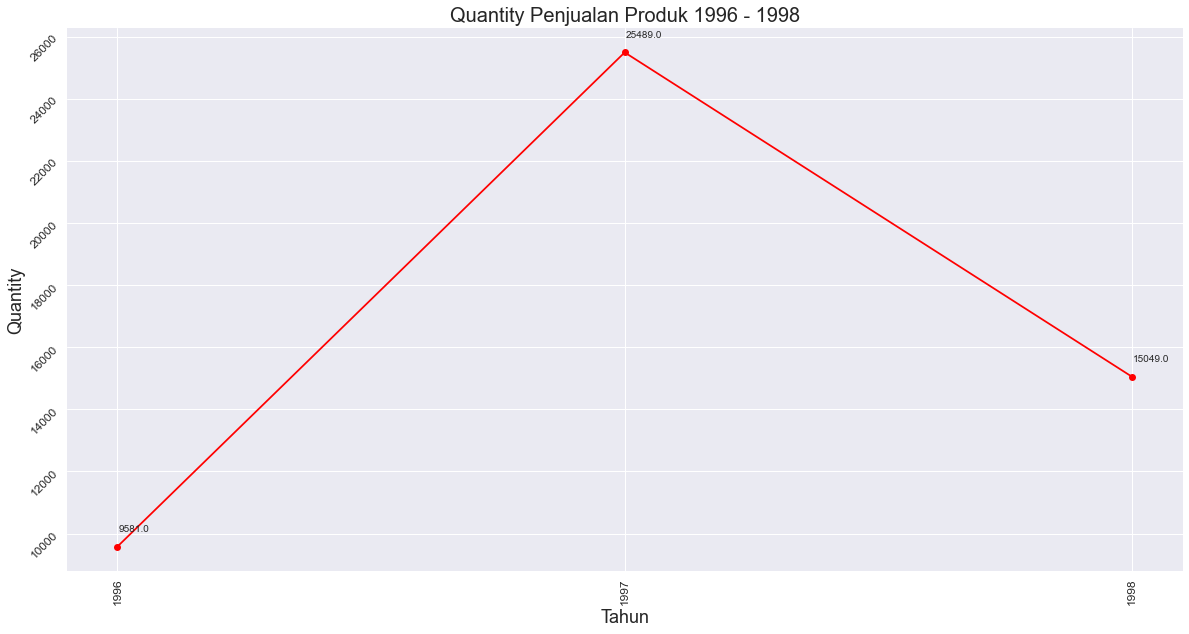

In [309]:
# Line Plot Year By Year Quantity

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearqty.index, yearqty['Quantity'], 'ro-')
plt.title('Quantity Penjualan Produk 1996 - 1998', size = 20)
plt.xlabel('Tahun', size = 18)
plt.ylabel('Quantity', size = 18)
plt.xticks(yearqty.index, rotation = 90, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(yearqty.index, round(yearqty['Quantity'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

Database yang dimiliki saat ini adalah database transaksi penjualan kendaraan dalam rentan tahun 1996 hingga tahun 1998. Mari coba kita lihat line graphic quantity order yang dipesan oleh customers dari tahun ke tahun. 

Terlihat jelas pada grafik, penjualan terbesar secara quantity dalam 1 tahun terjadi pada tahun 1997 yakni sebanyak 25489 pieces. Secara grafik diatas, dapat dilihat bahwa pada tahun 1996 dan 1998 nilai penjualan cukup menurun. Namun hal tersebut dikarenakan dari database yang dimiliki, tahun 1996 hanya memiliki range data 6 bulan terakhir dan tahun 1998 hanya memiliki range data 5 bulan terakhir.

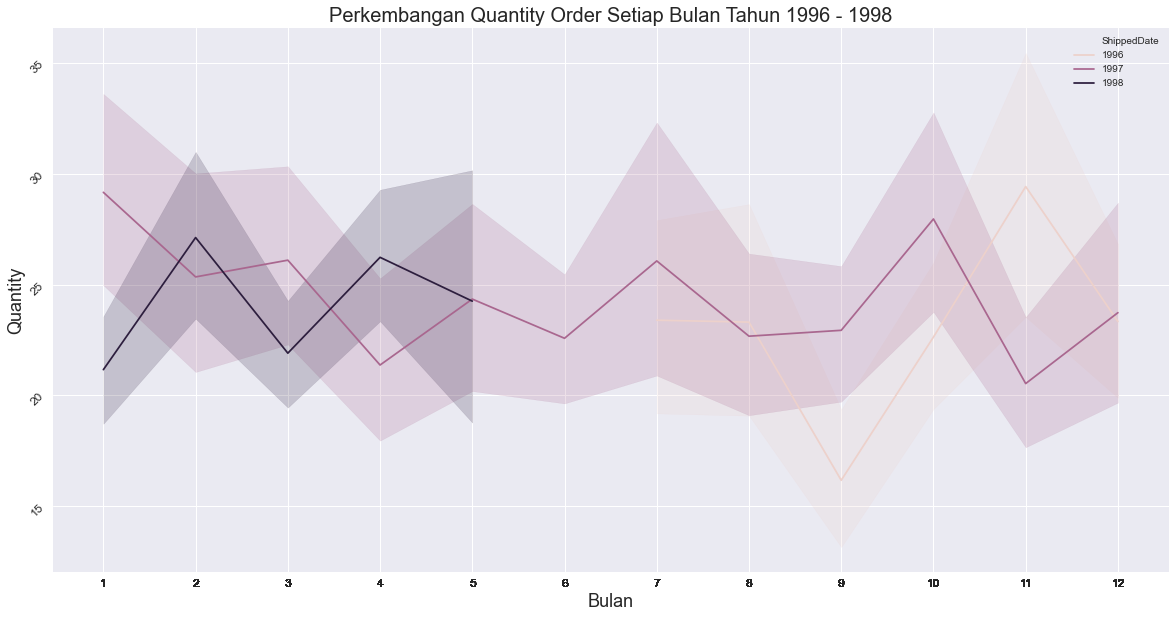

In [310]:
# Line Plot Quantity Each Month

plt.figure(figsize=(20,10))
sns.lineplot(data=tabel1, x=pd.DatetimeIndex(tabel1['ShippedDate']).month, y='Quantity', hue = pd.DatetimeIndex(tabel1['ShippedDate']).year)
plt.title('Perkembangan Quantity Order Setiap Bulan Tahun 1996 - 1998', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Quantity', size = 18)
plt.xticks(pd.DatetimeIndex(tabel1['ShippedDate']).month, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.show()

## **Visualisasi Data Outliers pada feature UnitsInStock**

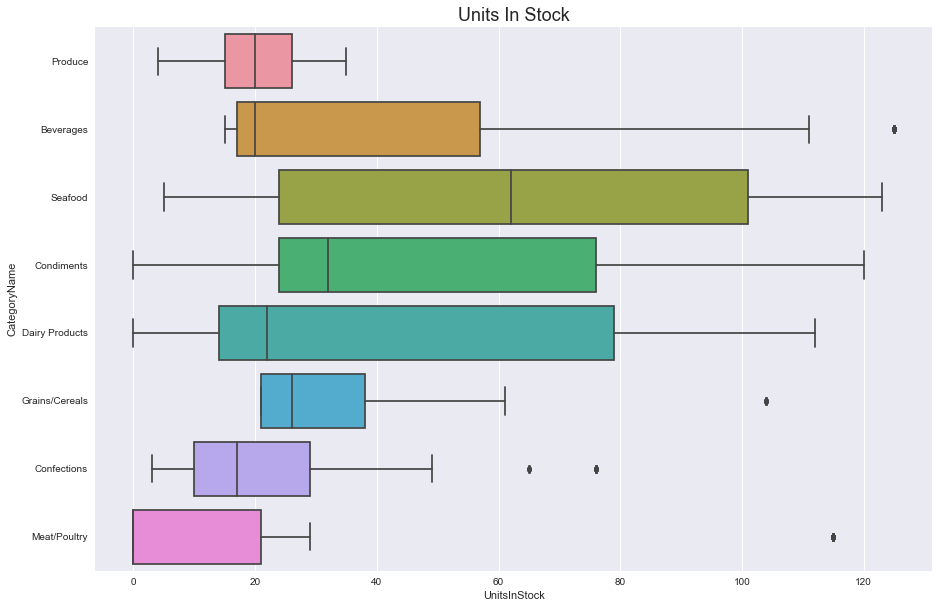

In [311]:
#Menampilkan Data Outlier pada feature UnitsInStock

plt.figure(figsize=(15,10))
sns.boxplot(x = tabel1['UnitsInStock'], y =tabel1['CategoryName'])
plt.title('Units In Stock', Size=18)
plt.show()

Dari Boxplot diatas kita dapat melihat bahwa secara general hanya sedikit outliers ``UnitsInStock`` yang ada yaitu pada Beverages, Graons/Cereals, Confections dan Meat/Poultry. Dimana masih banyak stock yang ada pada perusahaan untuk produk line Seafood dibandingkan dengan produk line yang lain.

## **Melihat Perbedaan Quantity Tiap Product**

In [312]:
# Uji Perbandingan Jumlah Quantity Antar Setiap Product Line (Normalitas)

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['Quantity'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (3.3119829334163484e-40 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


In [313]:
# Uji Perbandingan Jumlah Quantity Antar Setiap Product Line (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    tabel1[tabel1['CategoryName'] == 'Beverages']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Condiments']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Confections']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Dairy Products']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Grains/Cereals']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Meat/Poultry']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Produce']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Seafood']['Quantity']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Quantity pada Setiap Product Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Quantity pada Setiap Product Yang Ada')

Gagal Tolak H0 Karena P-Value (3.3119829334163484e-40 > 5%)
Tidak Terdapat Perbedaan Nilai Median Quantity pada Setiap Product Yang Ada


## **Hubungan antara Order, Stock, Price, ReOrder dan Freight**

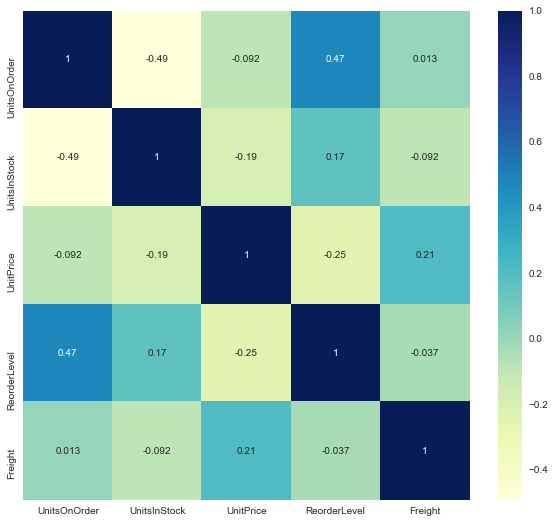

In [314]:
# Mencari Korelasi (Hubungan antara Order, Stock, Price, ReOrder, Discontinued dan Freight)

plt.figure(figsize=(10,9))
sns.heatmap(tabel1[['UnitsOnOrder', 'UnitsInStock', 'UnitPrice', 'ReorderLevel','Freight']].corr('spearman'), annot=True, cmap='YlGnBu')

Dari heatmap diatas dapat kita lihat bahwa yang memiliki korelasi paling tinggi adalah antara feature ``Reorder Level`` dan feature ``UnitsOnOrder``. Hal ini menunjukkan bahwa unit yang sedang di order di dalam dataset kemungkinan besar merupakan produk yang di reorder oleh customers. Oleh karena itu perusahaan sangat disarankan untuk berfokus atau meningkatkan produksi pada produk yang sering dibeli dah dilakukan reorder oleh customers *(untuk melihat line produk apa saja yang sering di dilakukan reorder oleh customers kita sudah membahasnya sebelumnya)*.

Kita juga dapat melihat bahwa adanya sedikit korelasi antara feature ``UnitPrice`` dan feature ``Freight``. Hal ini mungkin disebabkan oleh perbedaan penetapan harga pada biaya pengiriman (freight) pada setiap unit makanan. Sehingga pada produk tertentu, ``UnitPrice`` akan menyesuaikan harga sesuai dengan biaya pengiriman ``freight``

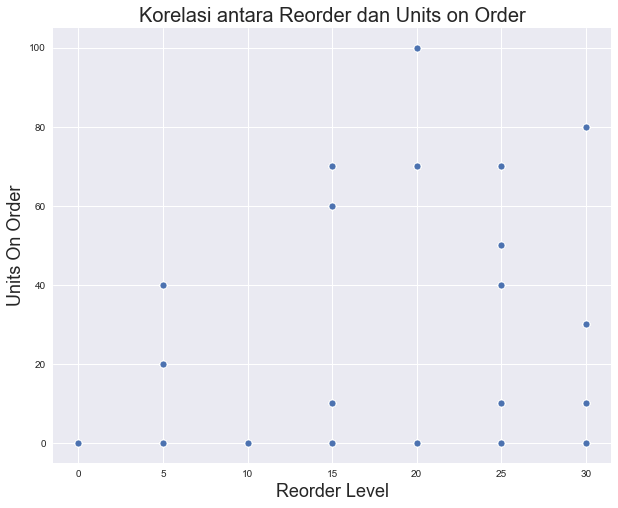

In [315]:
# Korelasi Antara Feature ReorderLevel dan UnitsOnOrder

plt.figure(figsize=(10,8))
sns.scatterplot(tabel1['ReorderLevel'], tabel1['UnitsOnOrder'])
plt.title('Korelasi antara Reorder dan Units on Order', size = 20)
plt.xlabel('Reorder Level', size = 18)
plt.ylabel('Units On Order', size = 18)
plt.show()

Melihat dengan adanya korelasi antara feature ``Reorder Level`` dan ``Units On Order`` pada heatmap, sekarang kita coba akan menelusuri hubungan antara kedua feature tersebut dengan scatter plot. Dapat kita lihat bahwa tidak terlalu bisa menyimpulkan korelasi antara Reorder Level dan Units On Order dikarenakan persebaran datanya berdistribusi tidak normal.